In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

/Users/sherwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 获取数据

In [2]:
train = pd.read_csv("./data/train.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.shape

(42000, 785)

## 确定特征值\目标值

In [7]:
train_image = train.ix[:, 1:]

/Users/sherwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [8]:
train_image.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_label = train.ix[:, 0]

/Users/sherwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [10]:
train_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

## 查看具体图像

In [14]:
num = train_image.ix[0,].values.reshape(28, 28)

/Users/sherwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


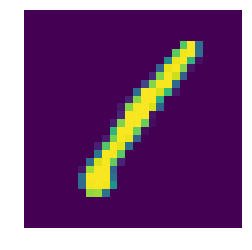

In [15]:
plt.imshow(num)
plt.axis("off")
plt.show()

In [16]:
def to_plot(n):
    num = train_image.ix[n,].values.reshape(28, 28)
    
    plt.imshow(num)
    plt.axis("off")
    plt.show()

/Users/sherwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


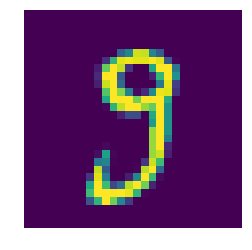

In [19]:
to_plot(n=40)

# 数据基本处理

In [22]:
train_image.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 数据归一化处理

In [23]:
# 对数据特征值归一化处理
train_image = train_image.values / 255

In [26]:
train_label = train_label.values

## 数据集分割

In [28]:
x_train, x_val, y_train, y_val = train_test_split(train_image, train_label, train_size = 0.8, random_state=0)

In [30]:
print(x_train.shape, x_val.shape)

(33600, 784) (8400, 784)


# 特征降维和模型训练

In [32]:
import time
from sklearn.decomposition import PCA

# 多次使用pca,确定最后的最优模型

def n_components_analysis(n, x_train, y_train, x_val, y_val):
    # 记录开始时间
    start = time.time()
    
    # pca降维实现
    pca = PCA(n_components=n)
    print("特征降维,传递的参数为:{}".format(n))
    pca.fit(x_train)
    
    # 在训练集和测试集进行降维
    x_train_pca = pca.transform(x_train)
    x_val_pca = pca.transform(x_val)
    
    # 利用svc进行训练
    print("开始使用svc进行训练")
    ss = svm.SVC()
    ss.fit(x_train_pca, y_train)
    
    # 获取accuracy结果
    accuracy = ss.score(x_val_pca, y_val)
    
    # 记录结束时间
    end = time.time()
    print("准确率是:{}, 消耗时间是:{}s".format(accuracy, int(end-start)))
    
    return accuracy 

In [34]:
# 传递多个n_components,寻找合理的n_components:

n_s = np.linspace(0.70, 0.85, num=5)
accuracy = []

for n in n_s:
    tmp = n_components_analysis(n, x_train, y_train, x_val, y_val)
    accuracy.append(tmp)

特征降维,传递的参数为:0.7
开始使用svc进行训练
准确率是:0.9761904761904762, 消耗时间是:12s
特征降维,传递的参数为:0.7374999999999999
开始使用svc进行训练
准确率是:0.9779761904761904, 消耗时间是:12s
特征降维,传递的参数为:0.7749999999999999
开始使用svc进行训练
准确率是:0.9783333333333334, 消耗时间是:16s
特征降维,传递的参数为:0.8125
开始使用svc进行训练
准确率是:0.9798809523809524, 消耗时间是:18s
特征降维,传递的参数为:0.85
开始使用svc进行训练
准确率是:0.9803571428571428, 消耗时间是:22s


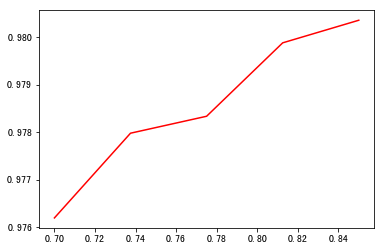

In [35]:
# 准确率可视化展示
plt.plot(n_s, np.array(accuracy), "r")
plt.show()

经过图形展示,选择合理的n_components, 最后综合考虑确定结果为:0.80

# 确定最优模型

In [36]:
pca = PCA(n_components=0.80)

pca.fit(x_train)
pca.n_components_

43

In [37]:
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)

In [39]:
print(x_train_pca.shape, x_val_pca.shape)

(33600, 43) (8400, 43)


In [40]:
# 训练比较优的模型,计算accuracy

ss1 = svm.SVC()

ss1.fit(x_train_pca, y_train)

ss1.score(x_val_pca, y_val)

0.979047619047619